# Discussion 10: How can I zoom in on the Full Disk Images? 

In [1]:
from goes2go.data import goes_nearesttime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import metpy

In [2]:
ds = goes_nearesttime('2021-10-18 18:00',
                      satellite='goes16',
                      domain='F',
                      save_dir='$TMPDIR')
ds

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPF    |
 |    Domain: F                |
📦 Finished downloading [1] files to [$TMPDIR/noaa-goes16/ABI-L2-MCMIPF].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

<xarray.Dataset>
Dimensions:                                 (y: 5424, x: 5424, number_of_time_bounds: 2, number_of_image_bounds: 2, band: 1)
Coordinates: (12/41)
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1518 ... -0.1518
  * x                                       (x) float32 -0.1518 ... 0.1518
    y_image                                 float32 ...
    x_image                                 float32 ...
    band_wavelength_C01                     (band) float32 ...
    ...                                      ...
    band_id_C15                             (band) int8 ...
    band_id_C16                             (band) int8 ...
    dataset_name                            <U74 'OR_ABI-L2-MCMIPF-M6_G16_s20...
    date_created                            <U22 '2021-10-18T18:10:01.8Z'
    time_coverage_start                     <U22 '2021-10-18T18:00:20.3Z'
    time_coverage_end                       <U22 '2021-10-18T18:09:51.7Z'
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, band
Data variables: (12/125)
    CMI_C01                                 (y, x) float32 ...
    DQF_C01                                 (y, x) float32 ...
    CMI_C02                                 (y, x) float32 ...
    DQF_C02                                 (y, x) float32 ...
    CMI_C03                                 (y, x) float32 ...
    DQF_C03                                 (y, x) float32 ...
    ...                                      ...
    std_dev_brightness_temperature_C16      float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    dynamic_algorithm_input_data_container  int32 ...
    algorithm_product_version_container     int32 ...
    filename                                <U112 'noaa-goes16/ABI-L2-MCMIPF/...
Attributes: (12/26)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    processing_level:          National Aeronautics and Space Administration ...
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        b84a6f91-3da6-4ea9-994e-c157237d1d97
    path:                      ['noaa-goes16/ABI-L2-MCMIPF/2021/291/18/OR_ABI...

In [3]:
# parse the grid projection data with MetPy
ds = ds.metpy.parse_cf()

# get the cartopy coordinate reference system
crs = ds.metpy_crs.item().to_cartopy()


/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "time_bounds".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "goes_imager_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "y_image_bounds".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "x_image_bounds".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/

/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


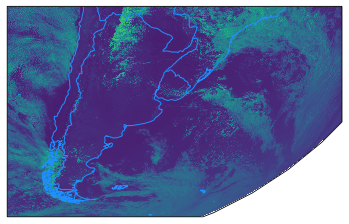

In [4]:
# Plot the data in projection coordinates
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=crs)
ax.pcolormesh(ds.x, ds.y, ds.CMI_C01)

ax.coastlines(color='dodgerblue')
ax.add_feature(cfeature.BORDERS, color='dodgerblue')

# Zoom (a bit tricky to fine tune because of different projections.)
ax.set_extent([-80, -30, -60, -22], ccrs.PlateCarree())

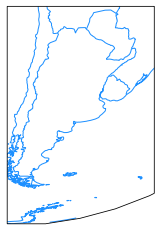

In [5]:
# Plot the data in projection coordinates
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=crs)
ax.coastlines(color='dodgerblue')
ax.add_feature(cfeature.BORDERS, color='dodgerblue')

# Zoom (a bit better to tune in the GOES coordinate reference system)
# [left_limit, right_limit, bottom_limit, top_limit]
ax.set_extent([0, 2_300_000, -5_400_000, -2_000_000], crs)

In [ ]:
ax = plt.subplot(projection=crs)
ax.imshow(ds.rgb.TrueColor(), **ds.rgb.imshow_kwargs)
ax.set_extent([0, 2_300_000, -5_400_000, -2_000_000], crs)

In [8]:
# Make figure on Cartopy axes
ax = plt.subplot(projection=ds.rgb.crs )
ax.imshow(ds.rgb.TrueColor(), **ds.rgb.imshow_kwargs)
ax.coastlines()

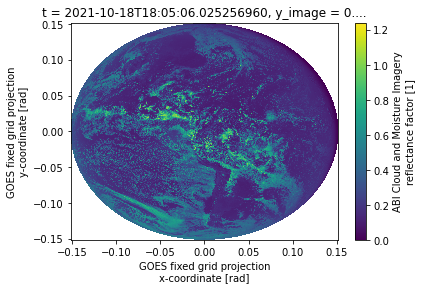

In [21]:
ds.CMI_C01.plot()

In [22]:
import metpy

In [23]:
ds = ds.metpy.parse_cf()

/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "time_bounds".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "goes_imager_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "y_image_bounds".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "x_image_bounds".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/

In [25]:
ds.metpy_crs.item().to_cartopy()

In [29]:
ds = ds.metpy.assign_y_x()

/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "CMI_C01".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "DQF_C01".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "CMI_C02".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "DQF_C02".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/goes

In [31]:
ds

<xarray.Dataset>
Dimensions:                                 (y: 5424, x: 5424, number_of_time_bounds: 2, number_of_image_bounds: 2)
Coordinates:
    t                                       datetime64[ns] 2021-10-18T18:05:0...
  * y                                       (y) float32 5.434e+06 ... -5.434e+06
  * x                                       (x) float32 -5.434e+06 ... 5.434e+06
    y_image                                 float32 0.0
    x_image                                 float64 0.0
    dataset_name                            <U74 'OR_ABI-L2-MCMIPF-M6_G16_s20...
    date_created                            <U22 '2021-10-18T18:10:01.8Z'
    time_coverage_start                     <U22 '2021-10-18T18:00:20.3Z'
    time_coverage_end                       <U22 '2021-10-18T18:09:51.7Z'
    metpy_crs                               object Projection: geostationary
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds
Data variables: (12/125)
    CMI_C01                                 (y, x) float32 ...
    DQF_C01                                 (y, x) float32 ...
    CMI_C02                                 (y, x) float32 ...
    DQF_C02                                 (y, x) float32 ...
    CMI_C03                                 (y, x) float32 ...
    DQF_C03                                 (y, x) float32 ...
    ...                                      ...
    std_dev_brightness_temperature_C16      float64 15.55
    percent_uncorrectable_GRB_errors        float64 0.0
    percent_uncorrectable_L0_errors         float64 0.0
    dynamic_algorithm_input_data_container  int32 -2147483647
    algorithm_product_version_container     int32 -2147483647
    filename                                <U112 'noaa-goes16/ABI-L2-MCMIPF/...
Attributes: (12/26)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    processing_level:          National Aeronautics and Space Administration ...
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        b84a6f91-3da6-4ea9-994e-c157237d1d97
    path:                      ['noaa-goes16/ABI-L2-MCMIPF/2021/291/18/OR_ABI...

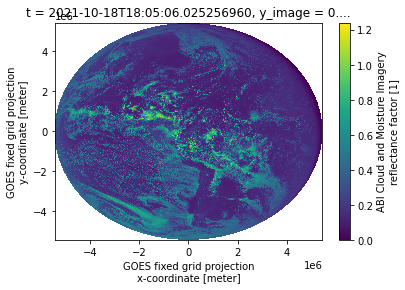

In [32]:
ds.CMI_C01.plot()

In [36]:
from toolbox.cartopy_tools import common_features, pc, ccrs

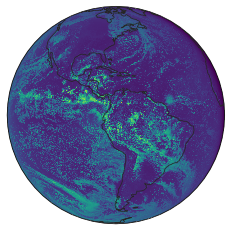

In [35]:
ax = common_features(crs=ds.metpy_crs.item().to_cartopy()).ax
ax.pcolormesh(ds.x, ds.y, ds.CMI_C01)

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/p/home/blaylock/anaconda3/envs/goes2go/lib/python3.8/site-packages/matplotlib/colors.py:1159: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


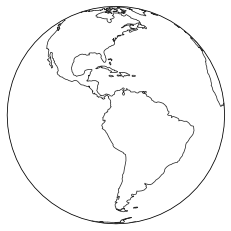

In [53]:
ax = common_features(crs=ds.metpy_crs.item().to_cartopy()).ax
ax.pcolormesh(zoom_ds.x, zoom_ds.y, zoom_ds.CMI_C01)

In [39]:
goes_crs = ds.metpy_crs.item().to_cartopy()
goes_crs

In [74]:
extent = [-80, -40, -60, -20]

center_lon = ds.goes_imager_projection.longitude_of_projection_origin

min_lon, _ = goes_crs.transform_point(extent[0], 0, ccrs.PlateCarree())
max_lon, _ = goes_crs.transform_point(extent[1], 0, ccrs.PlateCarree())
_, min_lat = goes_crs.transform_point(center_lon, extent[2], ccrs.PlateCarree())
_, max_lat = goes_crs.transform_point(center_lon, extent[3], ccrs.PlateCarree())

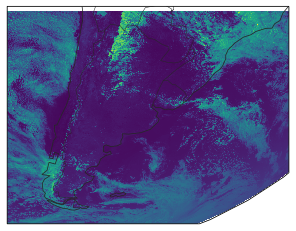

In [76]:
zoom_ds = ds.where((ds.x>=min_lon)&(ds.x<=max_lon)).where((ds.y>=min_lat)&(ds.y<=max_lat))

ax = common_features(crs=ds.metpy_crs.item().to_cartopy()).BORDERS().ax
ax.pcolormesh(zoom_ds.x, zoom_ds.y, zoom_ds.CMI_C01)
ax.set_extent(extent, pc)

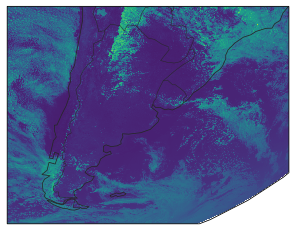

In [73]:
extent = [-80, -40, -60, -20]  # [min_lon, max_lon, min_lat, max_lat]
ax = common_features(crs=ds.metpy_crs.item().to_cartopy()).BORDERS().ax
ax.pcolormesh(ds.x, ds.y, ds.CMI_C01)
ax.set_extent(extent, pc)

In [64]:
ds.goes_imager_projection.longitude_of_projection_origin

-75.0

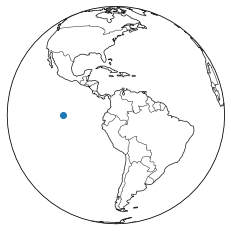

In [47]:
ax = common_features(crs=ds.metpy_crs.item().to_cartopy()).BORDERS().ax
ax.scatter(*goes_crs.transform_point(-100, 0, ccrs.PlateCarree()))
ax.set_global()
#ax.pcolormesh(ds.x, ds.y, ds.CMI_C01)